# Principal Component Analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# load dataset into Pandas DataFrame
df = pd.read_csv("/Users/sofielysenko/Desktop/FS2.csv")

In [5]:
df.head()

,Emotion,Point1,Point2,Point3,Point4,Point5,Point6,Point7,Point8,Point9,Point10,Point11,Point12
0,Neutral,988.89490,92.103570,326.82858,39.134293,259.90045,9.084934,1135.9967,29.140549,225.82065,615.13837,389.87090,562.1929
1,Neutral,988.89480,92.103610,326.80988,39.137665,259.89832,9.085932,1135.9991,29.138681,225.82065,615.13840,389.85974,562.1783
2,Neutral,988.74760,92.119705,326.77176,39.165806,259.86133,9.094901,1135.8872,29.266478,225.82024,615.13850,389.87457,562.1946
3,Neutral,988.62585,92.114365,326.78375,39.169315,259.72668,9.165421,1135.8411,29.260437,225.84035,615.17600,389.75020,562.2566
4,Neutral,988.57280,92.128720,326.71190,39.200413,259.72680,9.162093,1135.8304,29.256575,225.76520,615.17535,389.65005,562.1876


In [6]:
from sklearn.preprocessing import StandardScaler


features = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10','11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64']
#features =['1_x','1_y','2_x', '2_y', '3_x','3_y', '4_x', '4_y']
#features = ['m_bottom','m_top', 'r_eye_top', 'l_eye_top', 'r_eye_bottom', 'l_eye_bottom']
features = ['Point1', 'Point2', 'Point3', 'Point4', 'Point5', 'Point6','Point7','Point8','Point9','Point10','Point11','Point12']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Emotion']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [9]:
finalDf = pd.concat([principalDf, df[['Emotion']]], axis = 1)

finalDf.to_csv('FSPCA.csv')

In [10]:
finalDf.head()

,principal component 1,principal component 2,principal component 3,Emotion
0,3.996815,4.988749,-0.443572,Neutral
1,3.996767,4.988748,-0.443540,Neutral
2,3.996346,4.988022,-0.443205,Neutral
3,3.996139,4.987691,-0.442565,Neutral
4,3.995910,4.987554,-0.442293,Neutral


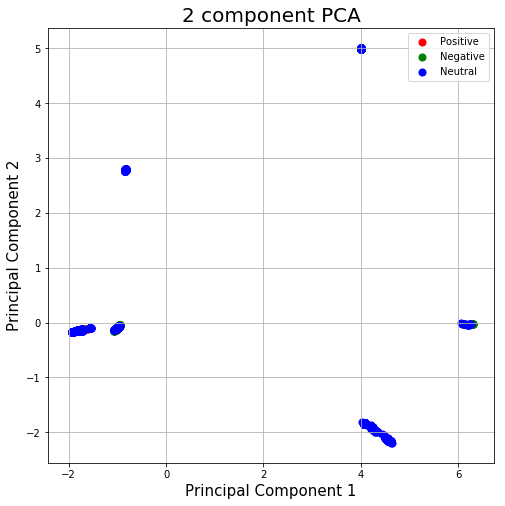

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Positive', 'Negative', 'Neutral']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Emotion'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

<IPython.core.display.Javascript object>


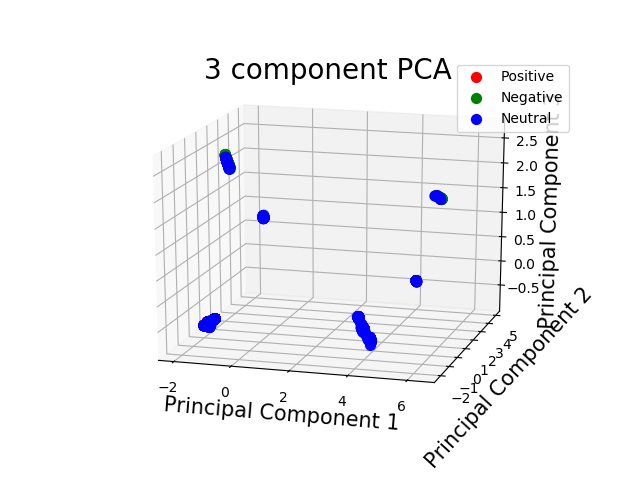

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['Positive', 'Negative', 'Neutral']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Emotion'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)

In [16]:
pca.explained_variance_ratio_ 

array([0.54301815, 0.22551233, 0.11104684])